<a href="https://colab.research.google.com/github/rickycarrillo3/ML-Projects/blob/main/Monte_Carlo_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome back to these demos ! Today, we will be exploring the simple but quite useful **Monte Carlo Simulations**. Their purpose is to estimate some probability of interest by iteratively taking samples from the sample space. The main idea is that given a. large number of iterations, or trials, the values of interest will come close to the probabilistic truth. We will delve into some simple examples and conclude with a more realistic application of this estimation method.

In [57]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will start by going through a simple, well-known example: rolling dice. Our sample space will consist of outcomes of the form $(r_1, r_2)$ where $r_1$ is the result of the first roll, and $r_2$ is the result of the second roll. We will simulate rolling two dice in order to estimate the mean of their sum, the variance of their sum, and the probabilities of each outcome.

We will discuss the theory behind the computation of the true values, but it is only included to be mathematically rigorous. If you want, you could just skip the following paragraph.

Now, using basic probability theory, we can estimate the true value of each of these. Let $X$ be the random variable with value equal to the sum of the dice rolls. Then, $X = R_1 + R_2$ where $R_1$ and $R_2$ are random variables themselves, each with value equal to $r_1$ and $r_2$ respectively.

Because of linearity of expectation, we have

$\mathbb{E}(X) = \mathbb{E}(R_1 + R_2) = \mathbb{E}(R_1) + \mathbb{E}(R_2) = 3.5 + 3.5 = 7$

Because $R_1$ and $R_2$ are independent, we have

$\text{Var}(X) = \text{Var}(R_1) + \text{Var}(R_2) = \frac{35}{6} \approx 5.833$

Finally, we also have that the probability of each outcome should be $\frac{1}{36} \approx 0.0278$.

In [58]:
class SimpleDiceSim:
  def __init__(self, iters=1000):
    self.iters = iters
    self.frequencies_dict = {}
    # Set up the possible outcomes
    for a in range(1, 7):
      for b in range(1,7):
        self.frequencies_dict[(a,b)] = 0

  def run_montecarlo(self):
    for iter in range(self.iters):
      value_1 = random.randint(1, 6)
      value_2 = random.randint(1,6)
      if iter % round(self.iters / 5) == 0:
        print(f"Roll # {iter}: Value 1: {value_1}, Value 2: {value_2}")
      # Add to the frequency list
      self.frequencies_dict[(value_1, value_2)] += 1

  def report_stats(self, stats_to_report={'MEAN', 'VARIANCE', 'PROBS'}):
    """
    Given one of the folllowing options,
    it reports the desired stats:

    - MEAN: The mean of the sum of values of the rolls

    - VARIANCE: The variance of the sum of the values of the rolls

    - PROBS: The probabilities of each outcome

    By default, reports all three. Also reports the
    true values (independent of the instance of the
    experiment)

    stats_to_report: A set with the options
    """

    if 'MEAN' in stats_to_report or 'VARIANCE' in stats_to_report:
    # Since we need to compute the mean for the variance, we do it regardless
    # Compute the mean
      total_sum = 0
      for outcome, freq in self.frequencies_dict.items():
        outcome_sum = outcome[0] + outcome[1]
        total_sum += outcome_sum * freq

      mean = total_sum / self.iters
      if 'MEAN' in stats_to_report:
        print(f"Mean: {mean: .3f} | Expected value: 7\n")

      if 'VARIANCE' in stats_to_report:
        var_sum = 0
        for outcome, freq in self.frequencies_dict.items():
          intermediate_sum = ((outcome[0] + outcome[1]) - mean) ** 2
          var_sum += intermediate_sum * freq

        var = var_sum / self.iters
        print(f"Variance: {var: .3f} | True Variance: 35/6\n")

    if 'PROBS' in stats_to_report:
      probs = {}
      for a in range(1,7):
        for b in range(1,7):
          probs[(a,b)] = self.frequencies_dict[(a,b)] / self.iters

      print(f"Probabilities: {probs} | Each outcome should have a probability of 1/36")

In [59]:
experiment = SimpleDiceSim()
long_experiment = SimpleDiceSim(50000)

# Short experiment results
experiment.run_montecarlo()
experiment.report_stats()
print("--------------------------------------")

# Long experiment results
long_experiment.run_montecarlo()
long_experiment.report_stats()

Roll # 0: Value 1: 2, Value 2: 2
Roll # 200: Value 1: 3, Value 2: 5
Roll # 400: Value 1: 5, Value 2: 3
Roll # 600: Value 1: 6, Value 2: 2
Roll # 800: Value 1: 2, Value 2: 4
Mean:  6.984 | Expected value: 7

Variance:  5.438 | True Variance: 35/6

Probabilities: {(1, 1): 0.028, (1, 2): 0.021, (1, 3): 0.032, (1, 4): 0.024, (1, 5): 0.014, (1, 6): 0.026, (2, 1): 0.025, (2, 2): 0.023, (2, 3): 0.037, (2, 4): 0.029, (2, 5): 0.031, (2, 6): 0.023, (3, 1): 0.023, (3, 2): 0.028, (3, 3): 0.034, (3, 4): 0.026, (3, 5): 0.034, (3, 6): 0.022, (4, 1): 0.03, (4, 2): 0.022, (4, 3): 0.031, (4, 4): 0.028, (4, 5): 0.037, (4, 6): 0.017, (5, 1): 0.041, (5, 2): 0.026, (5, 3): 0.031, (5, 4): 0.022, (5, 5): 0.03, (5, 6): 0.027, (6, 1): 0.04, (6, 2): 0.029, (6, 3): 0.037, (6, 4): 0.021, (6, 5): 0.028, (6, 6): 0.023} | Each outcome should have a probability of 1/36
--------------------------------------
Roll # 0: Value 1: 2, Value 2: 5
Roll # 10000: Value 1: 6, Value 2: 1
Roll # 20000: Value 1: 2, Value 2: 5
Roll 

This example dealt with a very simple scenario. However, we can use Monte Carlo simulations to explore more intricate scenarios. In our case, we will use the simulations to estimate financial losses for an **ETF** of interest.

We will build a predictive model of the **VaR** (Value at Risk) and **CVaR** (Conditional Value at Risk) of the Vanguard S&P 500 ETF (VOO) These two metrics both measure losses in the "worst-case" scenarios when investing.

Feel free to learn more here: https://www.investopedia.com/terms/c/conditional_value_at_risk.asp

**Before we go on, follow the next steps:**

**1) Go to https://www.marketwatch.com/ and look for the VOO ETF page.**

**2) Go to the bottom of the VOO page and download the csv with the historical daily prices.**

**3) Upload the CSV to Google Colab.**

In [60]:
filename = "Download Data - FUND_US_ARCX_VOO-2.csv" # Enter the name of your downloaded file here
df = pd.read_csv(f"/content/{filename}")
# Print first ten rows
print(df.head(10))
# Sort by date
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values(by='Date')
print(df.head())

print("--------------------------------------------------")

only_closing_df = df[['Close']]
# Print first ten rows
print(only_closing_df.head(10))
print(f"Rows: {only_closing_df.shape[0]}") # Should be around 250

         Date    Open    High     Low   Close      Volume
0  12/24/2025  632.67  635.32  632.54  634.78   3,275,186
1  12/23/2025  628.94  632.88  628.92  632.67  13,798,470
2  12/22/2025  628.97  630.27  627.80  629.73   9,850,052
3  12/19/2025  623.98  628.13  623.86  627.56  10,487,010
4  12/18/2025  623.05  625.94  620.57  622.01  37,062,391
5  12/17/2025  625.19  625.64  617.16  617.35  21,356,910
6  12/16/2025  624.55  626.22  620.65  624.21  15,819,620
7  12/15/2025  630.56  630.56  624.57  625.96  11,337,200
8  12/12/2025  632.80  633.43  624.48  626.87   8,534,727
9  12/11/2025  630.00  633.87  627.27  633.71  33,921,039
          Date    Open    High     Low   Close     Volume
249 2024-12-26  551.20  553.97  549.92  552.81  4,496,268
248 2024-12-27  549.37  549.62  543.20  547.08  7,077,135
247 2024-12-30  540.56  544.09  537.40  540.99  6,505,089
246 2024-12-31  542.45  543.07  537.40  538.81  6,040,750
245 2025-01-02  542.02  543.54  533.80  537.46  7,142,698
--------------

We will use the closing prices in our return calculations. Feel free to edit the code above and try using some other columns.

In [61]:
# Add shifted copy for simplicity of calculation
shifted_close_df = df['Close'].shift(periods=1)
# # Insert an additional closing column
only_closing_df.insert(1, 'Shifted Close', shifted_close_df)
print(only_closing_df.head())

      Close  Shifted Close
249  552.81            NaN
248  547.08         552.81
247  540.99         547.08
246  538.81         540.99
245  537.46         538.81


Now, we will compute the returns using the following formula.

$r_t = \log\left(\frac{P_t}{P_{t-1}}\right)$

One of the reasons behind using $\log$ returns instead of simple returns is the fact that increases and decreases in price are symmetric in terms of returns.

For instance, suppose we have \$10 and we have a \$1 increase followed by a \$1 decrease. This is a 10% increase from the base followed by a 9.09% ($\frac{1}{11} \cdot 100$) decrease in simple returns.

In the other hand, using log returns we have that the first change is $\log(\frac{11}{10})$ and the second change is $\log(\frac{10}{11})$, which completely cancel out, as desired.

In [62]:
# Make new data frames with returns
return_df = pd.DataFrame()
return_df['Returns'] = np.log(only_closing_df['Close'] / only_closing_df['Shifted Close'])
print(return_df.head(20))

      Returns
249       NaN
248 -0.010419
247 -0.011194
246 -0.004038
245 -0.002509
244  0.012830
243  0.005806
242 -0.011313
241  0.001347
240 -0.015334
239  0.001292
238  0.001271
237  0.018125
236 -0.001487
235  0.009546
234  0.009059
233  0.005665
232  0.005526
231 -0.003019
230 -0.014015


In [63]:
# Print some statistics
return_mean = return_df.mean()
print(f"Mean return over last year: {return_mean.item(): .5f}\n")
return_std = return_df.std()
print(f"Standard deviation of the return: {return_std.item(): .5f}\n")

Mean return over last year:  0.00056

Standard deviation of the return:  0.01167



array([[<Axes: title={'center': 'Returns'}>]], dtype=object)

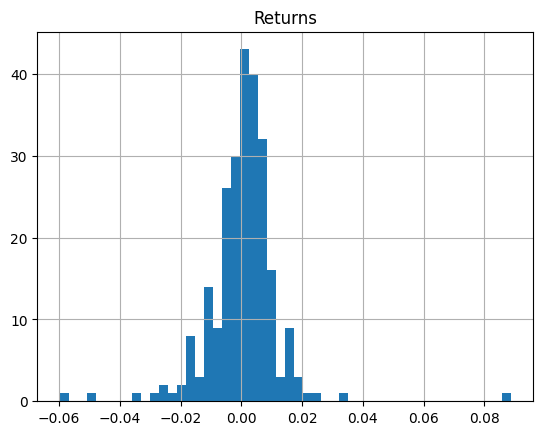

In [64]:
# Graphic of the returns (You'll see the motivation behind using a Normal Distribution)
pd.DataFrame.hist(return_df[['Returns']], bins=50)

We can go ahead and get rid of the top row, since it is undefined or NaN by our formulation. Now, we will start our Monte Carlo simulation step. In order to model future returns, we must assume a distribution for the returns. In other words, we must make an assumption as to how returns behave.

As a baseline, we will build a model with returns following a Normal distribution, i.e, $\mathcal{N}(\mu, \sigma^2)$, where $\mu$ is the sample mean, and $\sigma^2$ is the sample variance. In this model, daily returns will be independent draws from this distribution. This setup will serve as a solid baseline experiment.

We have already computed these two metrics, so we can fully specify the distribution we will use.

Before we move on, it is important that we describe the structure of the Monte Carlo simulation at hand since this one will be more complex than the dice rolling scenario.

**VaR and CVaR Monte Carlo Simulation Structure**

We will define $I$, the number of total iterations and $H$, the length of our horizon, i.e, the number of days for each iteration.

In each iteration, we will simulate returns from $H$ consecutive days. We will sample $H$ times from the normal distribution we defined above, and we will add these returns to obtain a total iteration return.


$r_1 + r_2 + ... + r_H = \sum_{i=1}^H \log\left(\frac{P_i}{P_{i-1}}\right) = \log\left(\frac{P_H}{P_0}\right) = \text{Return of investment with respect to the first day}$

We will then assume $P_0 = 1$ in order to get $P_H$ as a percentage by using the exponential function.

**NOTE**: this is just normalization, so it will not affect the correctness of our model by imposing additional assumptions. In other words, we are only setting the scale by fixing $P_0$ to the value we want, but it does not affect the model's core assumptions.

Overall, we will compute this quantity $I$ times, i.e, run this simulation $I$ times.



In [65]:
class Normal_Var_MC:

  def __init__(self, mu, std, horizon_days=10, iters=1000):
    self.mu = mu
    self.std = std
    self.horizon_days = horizon_days
    self.iters = iters
    self.return_values = None

  def run_simulation(self):
    self.return_values = []
    for i in range(self.iters):
      # Sample from given distribution the number of days given
      total_sample_return = 0
      for _ in range(self.horizon_days):
        sample = np.random.normal(self.mu, self.std)
        total_sample_return += sample
      # Compute final return value (including the compounding)
      end_return_value = np.exp(total_sample_return)
      self.return_values.append(end_return_value.item())
      if i % (self.iters / 5) == 0:
        print(f"Iteration: {i} | Simulated end return: {end_return_value.item(): .3f}")


  def report_mean(self):
    if self.return_values:
      mean = sum(self.return_values) / len(self.return_values)
      print(f"Mean: {mean}")
    else:
      print("Simulation not run yet")


  def compute_loss(self, df=False):
    if self.return_values:
      loss_values = [1 - a for a in self.return_values]
      return loss_values # For future edits return as a pandas Dataframe
    else:
      print("Simulation not run yet")



In order to compute the losses, we will take difference between $P_0$ and $P_H$. That is,

$L_H = P_0 - P_H = 1 - P_H$

Thus if the loss is $0.03$, the return of our investment was $-3\%$, i.e, we lost 3% of our investment.

In [66]:
normal_montecarlo = Normal_Var_MC(return_mean, return_std)
normal_montecarlo.run_simulation()
# Get return and loss
returns = normal_montecarlo.return_values
losses = normal_montecarlo.compute_loss()
# print(returns)
# print(losses)

Iteration: 0 | Simulated end return:  0.991
Iteration: 200 | Simulated end return:  0.980
Iteration: 400 | Simulated end return:  1.019
Iteration: 600 | Simulated end return:  0.998
Iteration: 800 | Simulated end return:  0.970


In [67]:
# Compute the Value At Risk and Conditional Value at Risk
def compute_var_and_cvar(losses, alpha=0.95, provide_values=False):
  # Get threshold quantity (VaR)
  value_at_risk = np.quantile(losses, alpha)
  losses_filtered = []
  for a in losses:
    if a > value_at_risk:
      losses_filtered.append(a)
  # Compute mean
  cvar= sum(losses_filtered) / len(losses_filtered)
  if provide_values:
    return value_at_risk, cvar, losses_filtered
  else:
    return value_at_risk, cvar

### Results #####
our_var, our_cvar = compute_var_and_cvar(losses)
print(f"Value at Risk at 95% confidence level: {our_var: .3f}")
print(f"Conditional Value at Risk at 95% confidence level: {our_cvar: .3f}")
print("----------------------------------------")
our_var_99, our_cvar_99 = compute_var_and_cvar(losses, alpha=0.99)
print(f"Value at Risk at 99% confidence level: {our_var_99: .3f}")
print(f"Conditional Value at Risk at 99% confidence level: {our_cvar_99: .3f}")

Value at Risk at 95% confidence level:  0.051
Conditional Value at Risk at 95% confidence level:  0.064
----------------------------------------
Value at Risk at 99% confidence level:  0.070
Conditional Value at Risk at 99% confidence level:  0.084


What do these values mean? Suppose VaR is 0.055 and CVaR is 0.071 at a 95% confidence level for both.

Given all of the losses, the Value at Risk metric tells us that in 95% of the losses, we do not lose more than 5.5% of our investment. Now, given that we lost more than 5.5%, the Conditional Value at Risk metric tells us that the average loss is 9.2%.

**This concludes this demo, but feel free to experiment with the distribution used for the VaR and CVaR Mc simulation. One natural step is to see how results would differ if instead of a normal distribution, we used a Student's t-distribution**